In [1]:
import requests
from matplotlib import pyplot

In [10]:
def get_seq_length():
    return 150

In [37]:
args = {
    "max_sequence_length": 200,
    "epochs": 200,
    "learning_rate": 0.0001,
    "batch_size": 16,
    "lstm_units": 16,
    "lstm_layers": 2,
    "optimizer": "adam",
    "use_tfidf": True,
    "use_normalization": False,
    "start_normalization": False,
    "end_normalization": False,
    "dropout": 0,
    "test_split": 0.2,
    "dev_split": 0.1,
    "synthesize_factor": 1
}
resp = requests.post("http://localhost:5000/api/model", json=args)
hist = resp.json()
pyplot.plot(hist['history']['loss'], label='train')
pyplot.plot(hist['history']['val_loss'], label='test')
pyplot.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
args = {
    "max_sequence_length": get_seq_length(),
    "epochs": 200,
    "learning_rate": 0.00003,
    "batch_size": 16,
    "lstm_units": 32,
    "lstm_layers": 3,
    "optimizer": "adam",
    "use_tfidf": True,
    "use_normalization": False,
    "start_normalization": False,
    "end_normalization": False,
    "dropout": 0.4,
    "test_split": 0.2,
    "dev_split": 0.2
}
resp = requests.post("http://localhost:5000/api/model", json=args)
hist = resp.json()
pyplot.plot(hist['history']['loss'], label='train')
pyplot.plot(hist['history']['val_loss'], label='test')
pyplot.show()

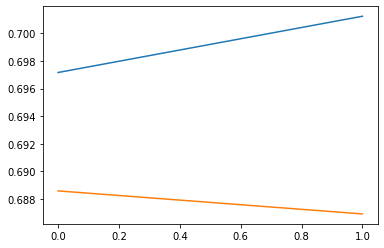

In [ ]:
def get_whois():
    return requests.get("https://hacker-news.firebaseio.com/v0/user/whoishiring/submitted.json").json()
    

In [ ]:
def get_post(id):
    return requests.get(f"https://hacker-news.firebaseio.com/v0/item/{id}.json").json()

In [ ]:
def is_hiring_post(post):
    return post.get("title", "").startswith("Ask HN: Who")

In [ ]:
resp = get_post(23379196)

In [ ]:
is_hiring_post(resp)

In [ ]:
job_posts = resp["kids"]

In [ ]:
def get_jobs(ids):
    jobs = []
    for id in ids:
        resp = get_post(id)
        if "text" in resp:
            jobs.append({"id": id, "text": resp["text"]})

    return jobs

In [ ]:
jobs = get_jobs(job_posts)

In [ ]:
jobs = [ job for job in jobs if len(job['text']) ]

In [ ]:
def get_prediction(job):
    resp = requests.post("http://localhost:5000/api/model/predict", json={ 'text': job['text'] })
    return resp.json()

In [ ]:
def get_bulk_predictions(jobs):
    resp = requests.post('http://localhost:5000/api/model/predictbulk', json= jobs)
    return resp.json()

In [ ]:
def get_predictions(j):
    predictions = []
    for job in j:
        result = get_prediction(job)
        result['id'] = job['id']
        predictions.append(result)
        if 'preferred' in result and result['preferred'] == 1:
            print(f"Looks like you're interested in {job['id']}")

    return predictions

In [ ]:
predictions = []

In [ ]:
bulk_predictions = get_bulk_predictions(jobs[0:2])

In [ ]:
bulk_predictions

In [ ]:
get_predictions(jobs[0:1])

In [ ]:
[x["id"] for x in jobs[0:5]]

In [ ]:
[x for x in jobs if x['id'] == 23380802 ][0]['text']

In [ ]:
def get_text(id):
    return [ x for x in jobs if  x['id'] == id ][0]['text']

In [ ]:
get_text(23381267)